# Tools

In [37]:
from matplotlib import pyplot as plt
import numpy as np, os, glob

from diffpy.Structure import loadStructure
import base64

from diffpy.structure.parsers import getParser
from bem import matter, xscalc, xtaloriprobmodel as xopm

In [38]:
%matplotlib inline

# Isotropic Model

In [39]:
# calculate xs
import numpy as np
wavelengths = np.arange(0.05, 5.5, 0.001)
T = 300

## Manual input 

In [40]:
# create material
atoms = [matter.Atom('Ni', (0,0,0)), matter.Atom('Ni', (0.5, 0.5, 0)),
         matter.Atom('Ni', (0.5,0,0.5)), matter.Atom('Ni', (0, 0.5, 0.5))]
a=3.5238
alpha = 90.
lattice = matter.Lattice(a=a, b=a, c=a, alpha=alpha, beta=alpha, gamma=alpha)
fccNi_1 = matter.Structure(atoms, lattice, sgid=225)

In [41]:
fccNi_1

[Ni   0.000000 0.000000 0.000000 1.0000,
 Ni   0.500000 0.500000 0.000000 1.0000,
 Ni   0.500000 0.000000 0.500000 1.0000,
 Ni   0.000000 0.500000 0.500000 1.0000]

In [42]:
calc = xscalc.XSCalculator(fccNi_1, T, max_diffraction_index=4)

## Using CIF file 

In [62]:
cif_file = "/Users/j35/git/NEUIT/static/cif/ni.cif"
#cif_file = "/Users/j35/git/NEUIT/static/cif/Cu.cif"
cif_file = "/Users/j35/git/NEUIT/static/cif/EntryWithCollCode9805.cif"

### reading manually 

In [63]:
with open(cif_file, 'r') as f:
    cif_file_content = f.read()

def parse_cif_upload(content):
    cif_s = content
    p = getParser('cif')
    struc = p.parse(cif_s)
    struc.sg = p.spacegroup
    return struc

fcc_2a = parse_cif_upload(cif_file_content)

In [64]:
calc = xscalc.XSCalculator(fcc_2a, T, max_diffraction_index=4)

ValueError: Debye temperature for 'O' is unknown to BEM. Please supply its value using `bem.conf` file

### reading via loadStructure 

In [56]:
# fcc_2b = loadStructure(cif_file, fmt='cif')
# p = getParser('cif')
# # fcc_2.sg = p.spacegroup

In [57]:
# fcc_2b

In [58]:
# calc = xscalc.XSCalculator(fcc_2b, T, max_diffraction_index=4)

## Calculation 

In [7]:
xs = calc.xs(wavelengths)

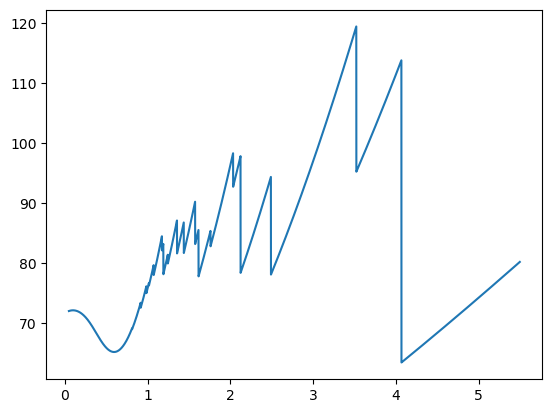

In [8]:
plt.plot(wavelengths, xs)

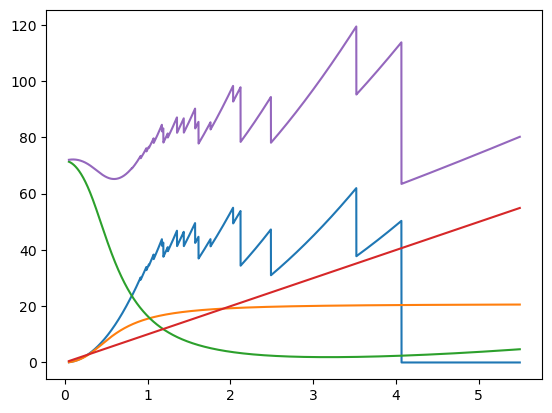

In [9]:
coh_el_xs = [calc.xs_coh_el(l) for l in wavelengths]
inc_el_xs = [calc.xs_inc_el(l) for l in wavelengths]
inel_xs = [calc.xs_inel(l) for l in wavelengths]
abs_xs = np.array([calc.xs_abs(l) for l in wavelengths])
plt.plot(wavelengths, coh_el_xs)
plt.plot(wavelengths, inc_el_xs)
plt.plot(wavelengths, inel_xs)
plt.plot(wavelengths, abs_xs)
plt.plot(wavelengths, abs_xs+coh_el_xs+inc_el_xs+inel_xs)

# With texture

In [10]:
texture_model = xopm.MarchDollase()
# by default, r for all hkl are 1.
# use the following form to change r
# make sure l>k>h
texture_model.r[(0,0,1)] = 2
# similarly beta can be changed
# texture_model.beta[(0,0,1)] = np.pi/2

calc = xscalc.XSCalculator(fccNi, T, texture_model)

In [11]:
xs = calc.xs(wavelengths)

/Users/j35/opt/anaconda3/envs/py38m1/lib/python3.8/site-packages/bem/xtaloriprobmodel.py:59: RuntimeWarning: invalid value encountered in divide
  div = np.array(hkl, float)/np.array(hkl1, float)
/Users/j35/opt/anaconda3/envs/py38m1/lib/python3.8/site-packages/bem/xtaloriprobmodel.py:78: RuntimeWarning: invalid value encountered in arcsin
  alpha = np.pi/2 - np.arcsin(wavelen/2./peak.d)
/Users/j35/opt/anaconda3/envs/py38m1/lib/python3.8/site-packages/bem/xtaloriprobmodel.py:59: RuntimeWarning: divide by zero encountered in divide
  div = np.array(hkl, float)/np.array(hkl1, float)
/Users/j35/opt/anaconda3/envs/py38m1/lib/python3.8/site-packages/bem/xtaloriprobmodel.py:61: RuntimeWarning: invalid value encountered in multiply
  if np.allclose(hkl, np.array(hkl1)*div):


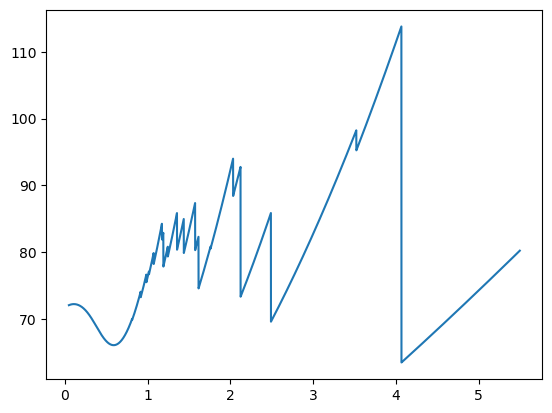

In [12]:
plt.plot(wavelengths, xs)

# With size effect (dynamical diffraction)

In [13]:
# use keyword "size". unit: meter
calc = xscalc.XSCalculator(fccNi, T, size=10e-6)

In [14]:
xs = calc.xs(wavelengths)

/Users/j35/opt/anaconda3/envs/py38m1/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


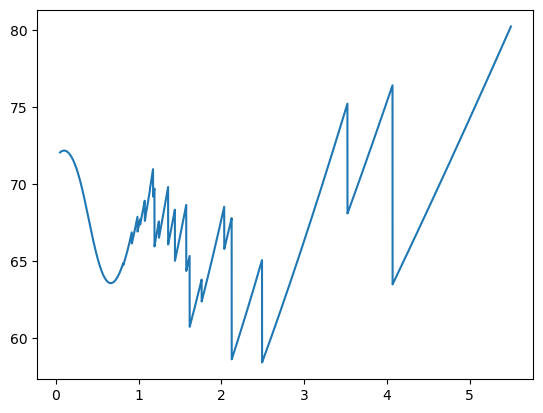

In [15]:
plt.plot(wavelengths, xs)